Hi there! This is my first kernel dealing with textual data so any constructive feedabacks are higly appreciated.

This dataset contains data of over 7 topics namely biology, robotics, cryptography, diy, travel, cooking, robotics and physics extracted from Stack Exchange. Each of these topics except physics have been classified as to which topic data belongs. So our task is to do predictions on unseen physics questions.

Since our data won't be related to each other for example tags in travel won't be related to tags in cryptography hence I will be using unsupervised learning on physics dataset which is the test dataset. 

In [3]:
#Importing all the neccesary libraries
import numpy as np 
import pandas as pd 

# import os
# print(os.listdir("H:\AI youtube download\AI projects\nlp\Transfer Learning on Stack Exchange Tags"))

import regex as re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

Making dictionary to put all the data in the same hood.

In [7]:
data={'bio':pd.read_csv('biology.csv',index_col=0),
      'robo':pd.read_csv('robotics.csv',index_col=0),
      'cryp':pd.read_csv('crypto.csv',index_col=0),
      'diy':pd.read_csv('diy.csv',index_col=0),
      'cooking':pd.read_csv('cooking.csv',index_col=0),
      'travel':pd.read_csv('travel.csv',index_col=0),
      'test':pd.read_csv('test.csv',index_col=0),
     }
data['robo']

,title,content,tags
id,,,
1,What is the right approach to write the spin c...,<p>Imagine programming a 3 wheel soccer robot....,soccer control
2,How can I modify a low cost hobby servo to run...,"<p>I've got some hobby servos (<a href=""http:/...",control rcservo
3,What useful gaits exist for a six legged robot...,"<p><a href=""http://www.oricomtech.com/projects...",gait walk
4,Good Microcontrollers/SOCs for a Robotics Project,<p>I am looking for a starting point for my pr...,microcontroller arduino raspberry-pi
5,Nearest-neighbor data structure for non-Euclid...,<p>I'm trying to implement a nearest-neighbor ...,motion-planning rrt
...,...,...,...
10568,What types of actuators do these industrial bo...,<p>I have a particular example robot that inte...,motor robotic-arm actuator torque
10573,Technique to increase POV resolution,<p>I have thought of a technique to increase t...,microcontroller electronics
10580,How can I upload sketches to an Arduino over a...,<p>I am doing robotics project on Raspberry pi...,arduino raspberry-pi embedded-systems first-ro...


**Text data preprocessing steps**

1- Data Cleaning(either using regex or BeautifulSoup): 
a) Removing HTML characters. 
b) Removing punctuation. 
c) Decoding encoded data.
d) Split attached words.
e) Removing URLs. 
f) Apostrophe removal.
g) Removing Expressions. 
h) Uppercase & Lowercase letters 
i) Numbers such as amounts and data.

2- Data Tokenization(using word_tokenize in nltk.tokenize) 
Segregation of text into individual words i.e tokens.

3- Stopword Removal(using stopwords in nltk.corpus)
Discarding too common words or words which are not going to be helpful in our analysis.

4- Stemming(using WordNetLemmatizer in nltk.stem) 
Combining different variants of words into a single parent word that conveys same meaning.

5-Vectorization (either using TfidVectorizer or Countvectorizer in sklearn.feature_extraction.text or word embeddings) Changing text data into vector format.


In [8]:
stops = set(stopwords.words("english"))

In [9]:
def clean_content(table):
    content = table.content
    #Converting text to lowercase characters
    content = content.apply(lambda x: x.lower())
    #Removing HTML tags
    content = content.apply(lambda x: re.sub(r'\<[^<>]*\>','',x))
    #Removing any character which does not match to letter,digit or underscore
    content = content.apply(lambda x: re.sub(r'^\W+|\W+$',' ',x))
    #Removing space,newline,tab
    content = content.apply(lambda x: re.sub(r'\s',' ',x))
    #Removing punctuation
    content = content.apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
    #Tokenizing data
    content = content.apply(lambda x: word_tokenize(x))
    #Removing stopwords
    content = content.apply(lambda x: [i for i in x if i not in stops])
    return(content)

Doing the cleaning process on title as well

In [10]:
def clean_title(table):
    title = table.title
    title = title.apply(lambda x: x.lower())
    title = title.apply(lambda x: re.sub(r'^\W+|\W+$',' ',x))
    title = title.apply(lambda x: re.sub(r'\s',' ',x))
    title = title.apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
    title = title.apply(lambda x: word_tokenize(x))
    title = title.apply(lambda x: [i for i in x if i not in stops])
    return(title)

Applying operations on data

In [11]:
for df in data:
    data[df].content = clean_content(data[df])

In [12]:
for df in data:
    data[df].title = clean_title(data[df])

In [13]:
data['robo']

,title,content,tags
id,,,
1,"[right, approach, write, spin, controller, soc...","[imagine, programming, 3, wheel, soccer, robot...",soccer control
2,"[modify, low, cost, hobby, servo, run, freely]","[got, hobby, servos, power, hd, 1501mgs, like,...",control rcservo
3,"[useful, gaits, exist, six, legged, robot, pro...","[http, www, oricomtech, com, projects, leg, ti...",gait walk
4,"[good, microcontrollers, socs, robotics, project]","[looking, starting, point, project, preferably...",microcontroller arduino raspberry-pi
5,"[nearest, neighbor, data, structure, non, eucl...","[trying, implement, nearest, neighbor, structu...",motion-planning rrt
...,...,...,...
10568,"[types, actuators, industrial, bots, use]","[particular, example, robot, interests, http, ...",motor robotic-arm actuator torque
10573,"[technique, increase, pov, resolution]","[thought, technique, increase, resolution, pov...",microcontroller electronics
10580,"[upload, sketches, arduino, raspberry, pi]","[robotics, project, raspberry, pi, arduino, ar...",arduino raspberry-pi embedded-systems first-ro...


 Visualizing our cleaned robo data using WordCloud

In [14]:
text = ' '
for x in data['robo'].content:
    for y in x:
        text+=' '+y

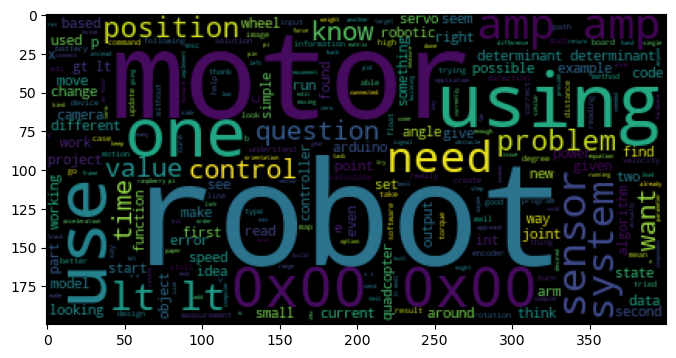

In [15]:
plt.figure(figsize=(8,10))
wc = WordCloud(max_words=1000,random_state=1).generate(text)
plt.imshow(wc)
plt.show()

WordCloud for cooking data

In [16]:
cooking = ' '
for x in data['cooking'].title:
    for y in x:
        cooking+=' '+y

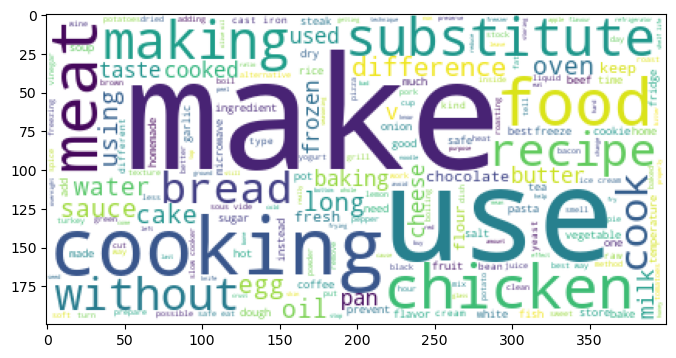

In [17]:
plt.figure(figsize=(8,10))
wf = WordCloud(background_color='white',max_words=1000,random_state=1).generate(cooking)
plt.imshow(wf)
plt.show()

WordCloud for cryptography

In [18]:
crypt = ' '
for i in data['cryp'].content:
    for j in i:
        crypt+=' '+j

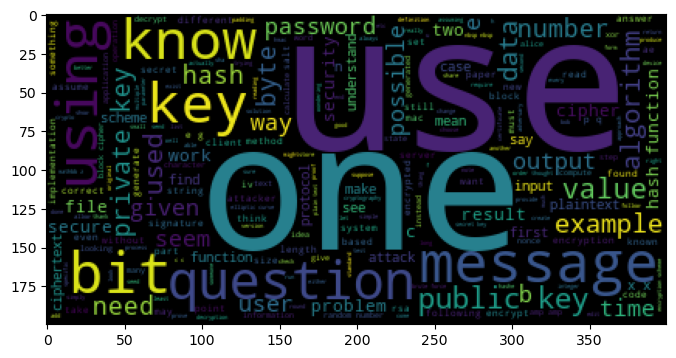

In [19]:
plt.figure(figsize=(8,10))
wg = WordCloud(background_color='black',max_words=1000,random_state=1).generate(crypt)
plt.imshow(wg)
plt.show()

**Stemming ** 

In [20]:
wordnet = WordNetLemmatizer()
data['test'].title = data['test'].title.apply(lambda x:[wordnet.lemmatize(i,pos='v') for i in x])
data['test'].content = data['test'].content.apply(lambda x:[wordnet.lemmatize(i,pos='v') for i in x])

Finally let's see how our test data look likes

In [21]:
tst = ' '
for i in data['test'].title:
    for j in i:
        tst+=' '+j     

WordCloud for physics dataset

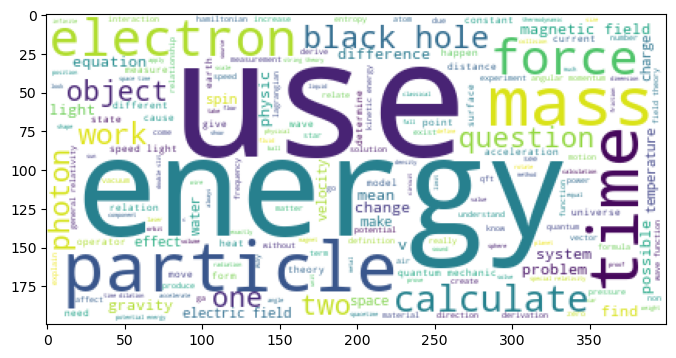

In [22]:
plt.figure(figsize=(8,10))
phy = WordCloud(background_color='white',max_words=1000,random_state=1).generate(tst)
plt.imshow(phy)
plt.show()

Vectrorizing data using TfidVectrorizer which uses the concept of term frequency and inverse document frequency to get rid of all non-consequential tokens from being vectorized.
For more details see https://www.quora.com/How-does-TfidfVectorizer-work-in-laymans-terms

In [23]:
def identity_tokenizer(text):
  return text
vect = TfidfVectorizer(tokenizer=identity_tokenizer,lowercase=False)
x = vect.fit_transform(data['test'].title.values)

In [24]:
indices = np.argsort(vect.idf_)[::-1]
features = vect.get_feature_names()
top_n = 50
top_features = [features[i] for i in indices[:top_n]]
top_features

C:\Users\User\AppData\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['6p',
 'pmu',
 'comonoids',
 'commutate',
 'ply',
 'plywood',
 'pm100',
 'pmd',
 'pmg',
 'pmh',
 'pmma',
 'pmms',
 'inflations',
 'pmssm',
 'pmt',
 'communite',
 'pointers',
 'eigendirections',
 'pneumatics',
 'pnmr',
 'eigenenergies',
 'inflatable',
 'commonalities',
 'inflammable',
 'infite',
 'poets',
 'infinte',
 'poiling',
 'committee',
 'commit',
 'inflows',
 'pluperfect',
 'comp',
 'eigenbras',
 'platinun',
 'plato',
 'plausability',
 'company',
 'eigeinvalue',
 'eigenbases',
 'playback',
 'informations',
 'players',
 'pld',
 'compactly',
 'pleat',
 '2ydy',
 'plemelj',
 'plemenj',
 'informal']

**k-means clustering**

In general, k-means is the first choice for clustering because of its simplicity. Here, the user has to define the number of clusters (Post on how to decide the number of clusters would be dealt later). The clusters are formed based on the closeness to the center value of the clusters. The initial center value is chosen randomly. K-means clustering is top-down approach, in the sense, we decide the number of clusters (k) and then group the data points into k clusters.

In [25]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=1)
model.fit(x)

KMeans(max_iter=100, n_clusters=20, n_init=1)

In [26]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vect.get_feature_names()
for i in range(20):
    print ("Cluster %d:" % i,)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind],)
    

Top terms per cluster:
Cluster 0:
 equation
 momentum
 angular
 conservation
 schr
 dinger
 dirac
 schrodinger
 operator
 derivation
Cluster 1:
 light
 speed
 travel
 faster
 source
 object
 move
 reflect
 visible
 ray
Cluster 2:
 time
 dilation
 space
 reversal
 travel
 evolution
 relativity
 dependent
 proper
 gravity
Cluster 3:
 physics
 question
 water
 black
 theory
 hole
 law
 use
 temperature
 work
Cluster 4:
 earth
 sun
 moon
 orbit
 would
 rotation
 magnetic
 around
 gravity
 surface
Cluster 5:
 happen
 would
 hole
 black
 light
 two
 energy
 object
 collide
 electrons
Cluster 6:
 velocity
 acceleration
 angular
 relative
 object
 escape
 initial
 find
 terminal
 calculate
Cluster 7:
 field
 quantum
 magnetic
 electric
 mechanics
 theory
 classical
 scalar
 entanglement
 electromagnetic
Cluster 8:
 force
 object
 act
 friction
 work
 magnetic
 apply
 gravity
 gravitational
 exert
Cluster 9:
 state
 quantum
 grind
 bind
 energy
 density
 spin
 particle
 system
 coherent
Cluster

C:\Users\User\AppData\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


So from the output we can infer following points:

Cluster 1 classifies text related to 'angular momentum', 'torque' which can be associated to 'motor'

Cluster 2 is related to 'visible light source' 

Cluster 3 deal with 'kinetic' and ' potential' energy which can be used to explain 'energy conservation'

Cluster 4 possibly relates to 'physics equations'

Cluster 10 has term like 'singularity' which is related to 'black hole'

Similarly we can draw other conclusions too.

Any feedbacks to improve it further are appreciated.

Thank you!